In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

# Stages of our Machine Learning Model Pipeline

- Data Preprocessing/Data Wrangling
- Exploratory Data Analysis and Data Visualization
- Feature Engineering and Feture Selection
- Machine Learning model Development
- Model Evaluation
- Model Deployment(Optional)

# Data Preprocessing/Data Wrangling


In [0]:
import xlrd
import csv

data_train_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Train.xlsx")
data_test_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Test.xlsx")
data_train_csv_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Train.csv")
data_test_csv_path = (r"/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/datasets/Data_Test.csv")

def csv_from_excel(data_path , csv_path):
    wb = xlrd.open_workbook(data_path)
    sh = wb.sheet_by_name('Sheet1')
    your_csv_file = open(csv_path, 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()

# runs the csv_from_excel function:
csv_from_excel(data_train_path , data_train_csv_path)
csv_from_excel(data_test_path , data_test_csv_path)

In [115]:
data_train = pd.read_csv(data_train_csv_path)
data_test = pd.read_csv(data_test_csv_path)
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [116]:
data_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014.0,40929.0,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013.0,54493.0,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017.0,34000.0,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012.0,139000.0,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014.0,29000.0,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [117]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   float64
 3   Kilometers_Driven  6019 non-null   float64
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(4), object(8)
memory usage: 564.4+ KB


In [118]:
data_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [119]:
data_train.shape , data_test.shape

((6019, 12), (1234, 11))

In [120]:
data_train.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [121]:
data_test.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [122]:
data_train["Mileage"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
6014    False
6015    False
6016    False
6017    False
6018    False
Name: Mileage, Length: 6019, dtype: bool

### Checking for Null and NaN Cells

In [123]:
df1 = data_train[data_train.isna().any(axis=1)]
df2 = data_test[data_test.isna().any(axis=1)]
df1.shape,df2.shape

((44, 12), (11, 11))

In [124]:
# Null present as string in the data 
data_test_null_string = data_test[data_test['Power'].str.contains('null' , na = True)]
data_test_null_string.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
928,Toyota Etios Liva G,Delhi,2012.0,77800.0,Petrol,Manual,First,18.3 kmpl,1197 CC,null bhp,5.0
666,Maruti Swift 1.3 VXi,Pune,2010.0,115000.0,Petrol,Manual,Second,16.1 kmpl,NaN,NaN,NaN
658,Fiat Punto 1.4 Emotion,Jaipur,2010.0,65000.0,Petrol,Manual,Third,14.6 kmpl,NaN,NaN,NaN
367,Nissan Teana 230jM,Coimbatore,2009.0,67038.0,Petrol,Automatic,First,9.1 kmpl,2349 CC,null bhp,5.0
74,Hyundai Santro Xing XL,Bangalore,2007.0,47000.0,Petrol,Manual,Second,0.0 kmpl,1086 CC,null bhp,5.0
1126,Toyota Etios Liva G,Kolkata,2012.0,37212.0,Petrol,Manual,First,18.3 kmpl,1197 CC,null bhp,5.0
426,Maruti Swift VDI BSIV W ABS,Coimbatore,2016.0,69564.0,Diesel,Manual,First,17.8 kmpl,1248 CC,null bhp,5.0
420,Hyundai Santro GLS I - Euro II,Bangalore,2011.0,43189.0,Petrol,Manual,First,0.0 kmpl,999 CC,null bhp,5.0
259,Toyota Etios GD,Bangalore,2012.0,90000.0,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
1073,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007.0,64168.0,Petrol,Automatic,First,17.0 kmpl,1086 CC,null bhp,5.0


In [125]:
# # data_test[data_test['Power'].str.contains('null' , na = True)]
# data_test.loc[data_test['Power'].str.contains('null' , na = True) , :]  = np.NaN
# data_test.loc[data_test.isnull().any(axis=1), :] = np.nan
# data_test["Power"] = data_test["Power"].replace(to_replace = [] , np.NaN)

columns_to_be_filled_with_NaN = ["Power"]

def fill_columns_with_NaN(columns_to_be_filled_with_NaN):
    for i in range (len(columns_to_be_filled_with_NaN)):    
        data_train[columns_to_be_filled_with_NaN[i]] = data_train[columns_to_be_filled_with_NaN[i]].replace(to_replace="[null]" , value = np.NaN , regex = True)
        data_test[columns_to_be_filled_with_NaN[i]] = data_test[columns_to_be_filled_with_NaN[i]].replace(to_replace="[null]" , value = np.NaN , regex = True)

fill_columns_with_NaN(columns_to_be_filled_with_NaN)
data_test.sample(100)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
515,Maruti Ritz VDi,Kolkata,2011.0,71428.0,Diesel,Manual,First,21.1 kmpl,1248 CC,73.9 bhp,5.0
393,Maruti Swift Dzire Vdi BSIV,Coimbatore,2018.0,57178.0,Diesel,Manual,First,19.3 kmpl,1248 CC,73.9 bhp,5.0
937,Toyota Innova 2.5 G4 Diesel 7-seater,Kochi,2011.0,64139.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0
1103,Hyundai Elantra SX AT,Bangalore,2016.0,25000.0,Petrol,Automatic,Second,14.5 kmpl,1797 CC,147.4 bhp,5.0
814,Mahindra XUV500 AT W10 FWD,Delhi,2017.0,25000.0,Diesel,Automatic,First,16.0 kmpl,2179 CC,140 bhp,7.0
...,...,...,...,...,...,...,...,...,...,...,...
469,Skoda Laura 1.9 TDI AT Ambiente,Kochi,2010.0,64132.0,Diesel,Automatic,Second,17.0 kmpl,1896 CC,105 bhp,5.0
944,Mahindra Scorpio VLX 2WD Airbag BSIII,Chennai,2008.0,130000.0,Diesel,Manual,Second,12.05 kmpl,2179 CC,120 bhp,8.0
1223,Hyundai Grand i10 Asta Option,Kolkata,2015.0,39000.0,Petrol,Manual,First,18.9 kmpl,1197 CC,82 bhp,5.0
444,BMW 3 Series 320d Sport,Ahmedabad,2016.0,40000.0,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0


In [126]:
data_test["Power"].value_counts()

74 bhp        45
98.6 bhp      35
73.9 bhp      27
82 bhp        23
86.8 bhp      22
              ..
245.41 bhp     1
191.34 bhp     1
252 bhp        1
185 bhp        1
236 bhp        1
Name: Power, Length: 248, dtype: int64

In [0]:
# data_test['Power'].str.contains('null' , na = True)

In [128]:
empty_cols_list_train = ["Mileage","Engine","Power","Seats"] 
empty_cols_list_test = ["Engine","Power","Seats"] 


def my_Nan_filling_function(dataset , empty_cols_list):
    for i in range(len(empty_cols_list)):
        
        # Replacing Nan with mean values
        # dataset[empty_cols_list[i]].fillna(dataset[empty_cols_list[i]].mean , inplace = True)
        
        # Replacing Nan with mode values
        dataset[empty_cols_list[i]].fillna(dataset[empty_cols_list[i]].mode()[0] , inplace = True)

    print(dataset)

my_Nan_filling_function(data_train , empty_cols_list_train)

                                  Name    Location  ...  Seats  Price
0               Maruti Wagon R LXI CNG      Mumbai  ...    5.0   1.75
1     Hyundai Creta 1.6 CRDi SX Option        Pune  ...    5.0  12.50
2                         Honda Jazz V     Chennai  ...    5.0   4.50
3                    Maruti Ertiga VDI     Chennai  ...    7.0   6.00
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  ...    5.0  17.74
...                                ...         ...  ...    ...    ...
6014                  Maruti Swift VDI       Delhi  ...    5.0   4.75
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  ...    5.0   4.00
6016             Mahindra Xylo D4 BSIV      Jaipur  ...    8.0   2.90
6017                Maruti Wagon R VXI     Kolkata  ...    5.0   2.65
6018             Chevrolet Beat Diesel   Hyderabad  ...    5.0   2.50

[6019 rows x 12 columns]


In [129]:
data_train.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [130]:
my_Nan_filling_function(data_test , empty_cols_list_test)

                                                   Name  ... Seats
0                               Maruti Alto K10 LXI CNG  ...   4.0
1                         Maruti Alto 800 2016-2019 LXI  ...   5.0
2             Toyota Innova Crysta Touring Sport 2.4 MT  ...   7.0
3                                  Toyota Etios Liva GD  ...   5.0
4                                     Hyundai i20 Magna  ...   5.0
...                                                 ...  ...   ...
1229                  Volkswagen Vento Diesel Trendline  ...   5.0
1230                             Volkswagen Polo GT TSI  ...   5.0
1231                             Nissan Micra Diesel XV  ...   5.0
1232                             Volkswagen Polo GT TSI  ...   5.0
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...  ...   5.0

[1234 rows x 11 columns]


In [131]:
data_test.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [132]:
list_of_columns_with_units = ["Mileage" , "Engine" , "Power"] 

def remove_units_from_columns(list_of_columns_with_units):
    for i in range(len(list_of_columns_with_units)):
        data_train[list_of_columns_with_units[i]] = data_train[list_of_columns_with_units[i]].str.split(" " , expand = True)
        data_train[list_of_columns_with_units[i]] = data_train[list_of_columns_with_units[i]].astype("float")
        data_test[list_of_columns_with_units[i]] = data_test[list_of_columns_with_units[i]].str.split(" " , expand = True)
        data_test[list_of_columns_with_units[i]] = data_test[list_of_columns_with_units[i]].astype("float")

remove_units_from_columns(list_of_columns_with_units)
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [0]:
data_train["Year"] = data_train["Year"].astype("int32" , copy = False)
data_test["Year"] = data_test["Year"].astype("int32" , copy = False)

### After Remoing NULL/ NaN values and casting to year to interger datatype

In [134]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int32  
 3   Kilometers_Driven  6019 non-null   float64
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(6), int32(1), object(5)
memory usage: 540.9+ KB


In [135]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int32  
 3   Kilometers_Driven  1234 non-null   float64
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
dtypes: float64(5), int32(1), object(5)
memory usage: 101.4+ KB


#  Exploratory Data Analysis and Data Visualisation



### Removing Outliers

In [136]:
data_train.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000.0,Electric,Automatic,First,17.00,72.0,41.00,5.0,13.00
1144,Mercedes-Benz E-Class 2009-2013 E 200 CGI Avan...,Kochi,2016,35939.0,Petrol,Manual,First,12.30,1796.0,185.00,5.0,30.42
5883,Hyundai i20 Sportz 1.2,Delhi,2015,42000.0,Petrol,Manual,Second,18.60,1197.0,81.83,5.0,5.80
3705,Mercedes-Benz GLC 220d 4MATIC Style,Coimbatore,2019,29311.0,Diesel,Automatic,First,17.90,2143.0,170.00,5.0,50.97
1037,Jaguar XF 2.2 Litre Luxury,Delhi,2014,48000.0,Diesel,Automatic,First,16.36,2179.0,187.70,5.0,26.50


In [137]:
data_train._get_numeric_data()

def get_numerical_features(dataset):
    df = dataset
    df_numerics_only = df.select_dtypes(include=np.number)
    # print(df_numerics_only)
    colnames_numerics_only = df.select_dtypes(include=np.number).columns.tolist()
    # print(colnames_numerics_only)
    return colnames_numerics_only

df_train = get_numerical_features(data_train)
df_train

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

In [138]:
df_test = get_numerical_features(data_test)
df_test

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

In [139]:
print(data_train.shape)

remove_train_outliers_list = df_train
remove_test_outliers_list = df_test

def remove_outliers(dataset , remove_outliers_list):
    # Iterating across the list of numerical categories for which the outliers have to be removed
    for i in range(len(remove_outliers_list)):
        # Change the value of the outlier criterion for better results
        dataset.drop(dataset[dataset[remove_outliers_list[i]] >=( 0.99999 * dataset[remove_outliers_list[i]].max()) ].index, inplace = True )
        dataset.drop(dataset[dataset[remove_outliers_list[i]] <=( 0.00001 * dataset[remove_outliers_list[i]].min()) ].index, inplace = True )

remove_outliers(data_train , remove_train_outliers_list)
remove_outliers(data_test , remove_test_outliers_list)

print(data_train.shape)

(6019, 12)
(5903, 12)


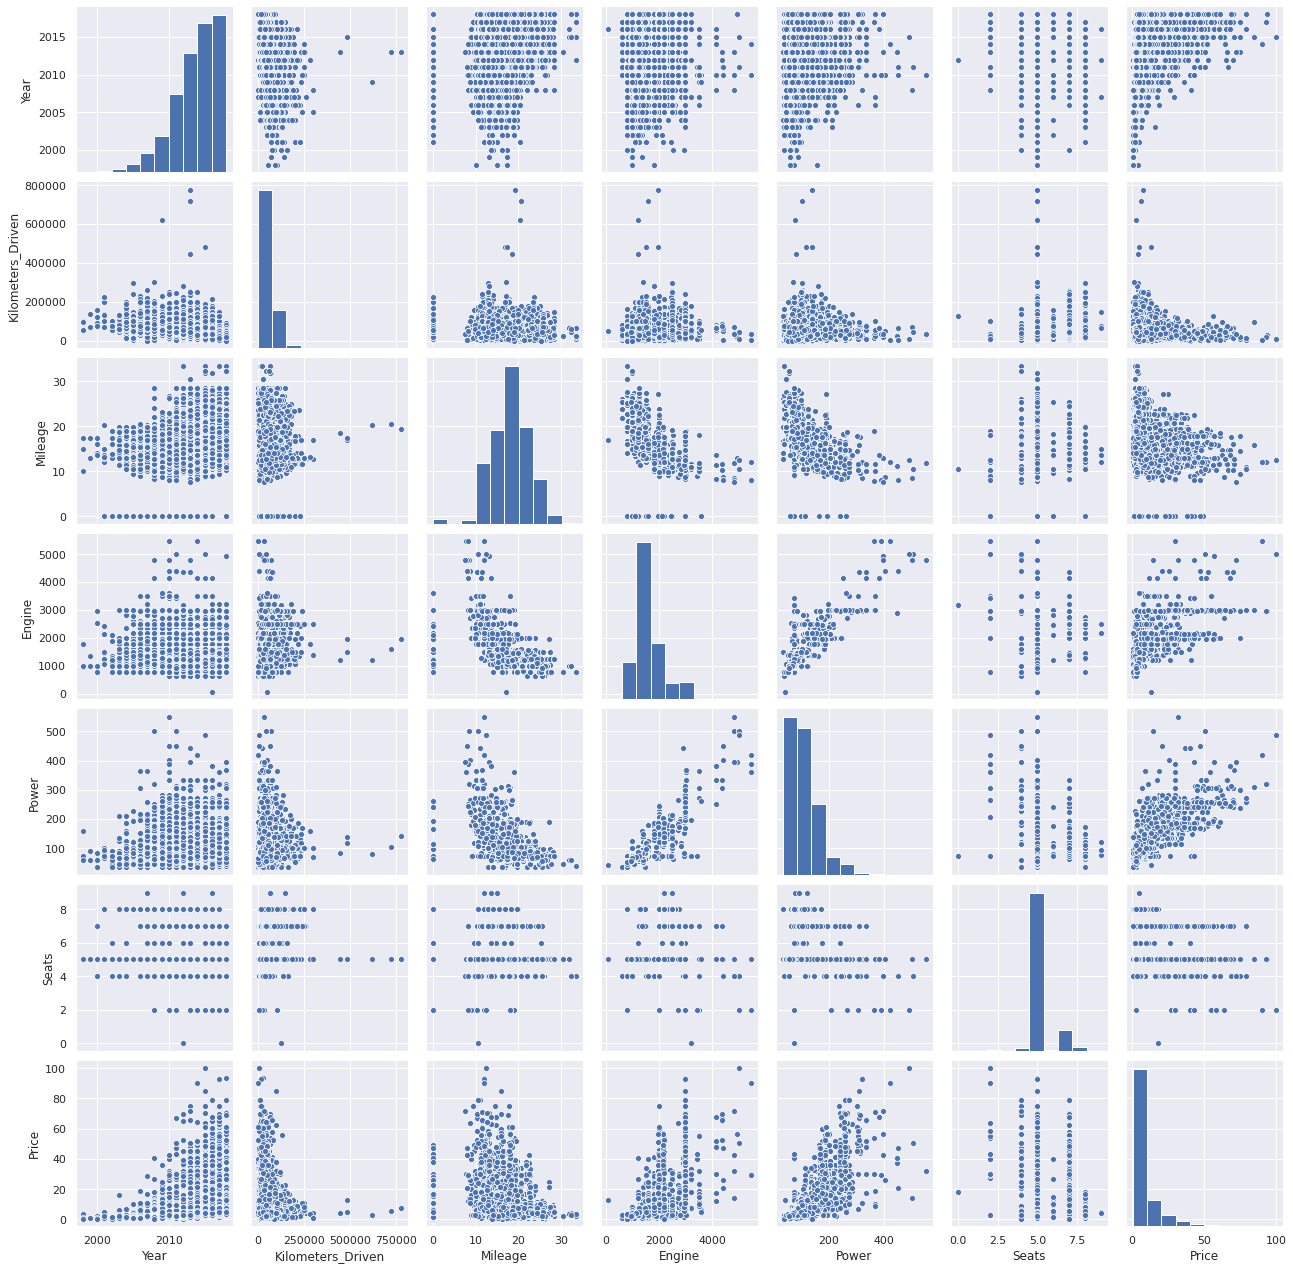

In [140]:
sns.pairplot(data_train)

In [141]:
data_train["Fuel_Type"].value_counts()

Diesel      3143
Petrol      2698
CNG           50
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [142]:
data_train["Kilometers_Driven"].value_counts()

60000.0    82
45000.0    70
65000.0    67
50000.0    61
55000.0    60
           ..
54996.0     1
77469.0     1
8950.0      1
22695.0     1
88578.0     1
Name: Kilometers_Driven, Length: 2998, dtype: int64

In [143]:
df_train

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

In [144]:
data_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


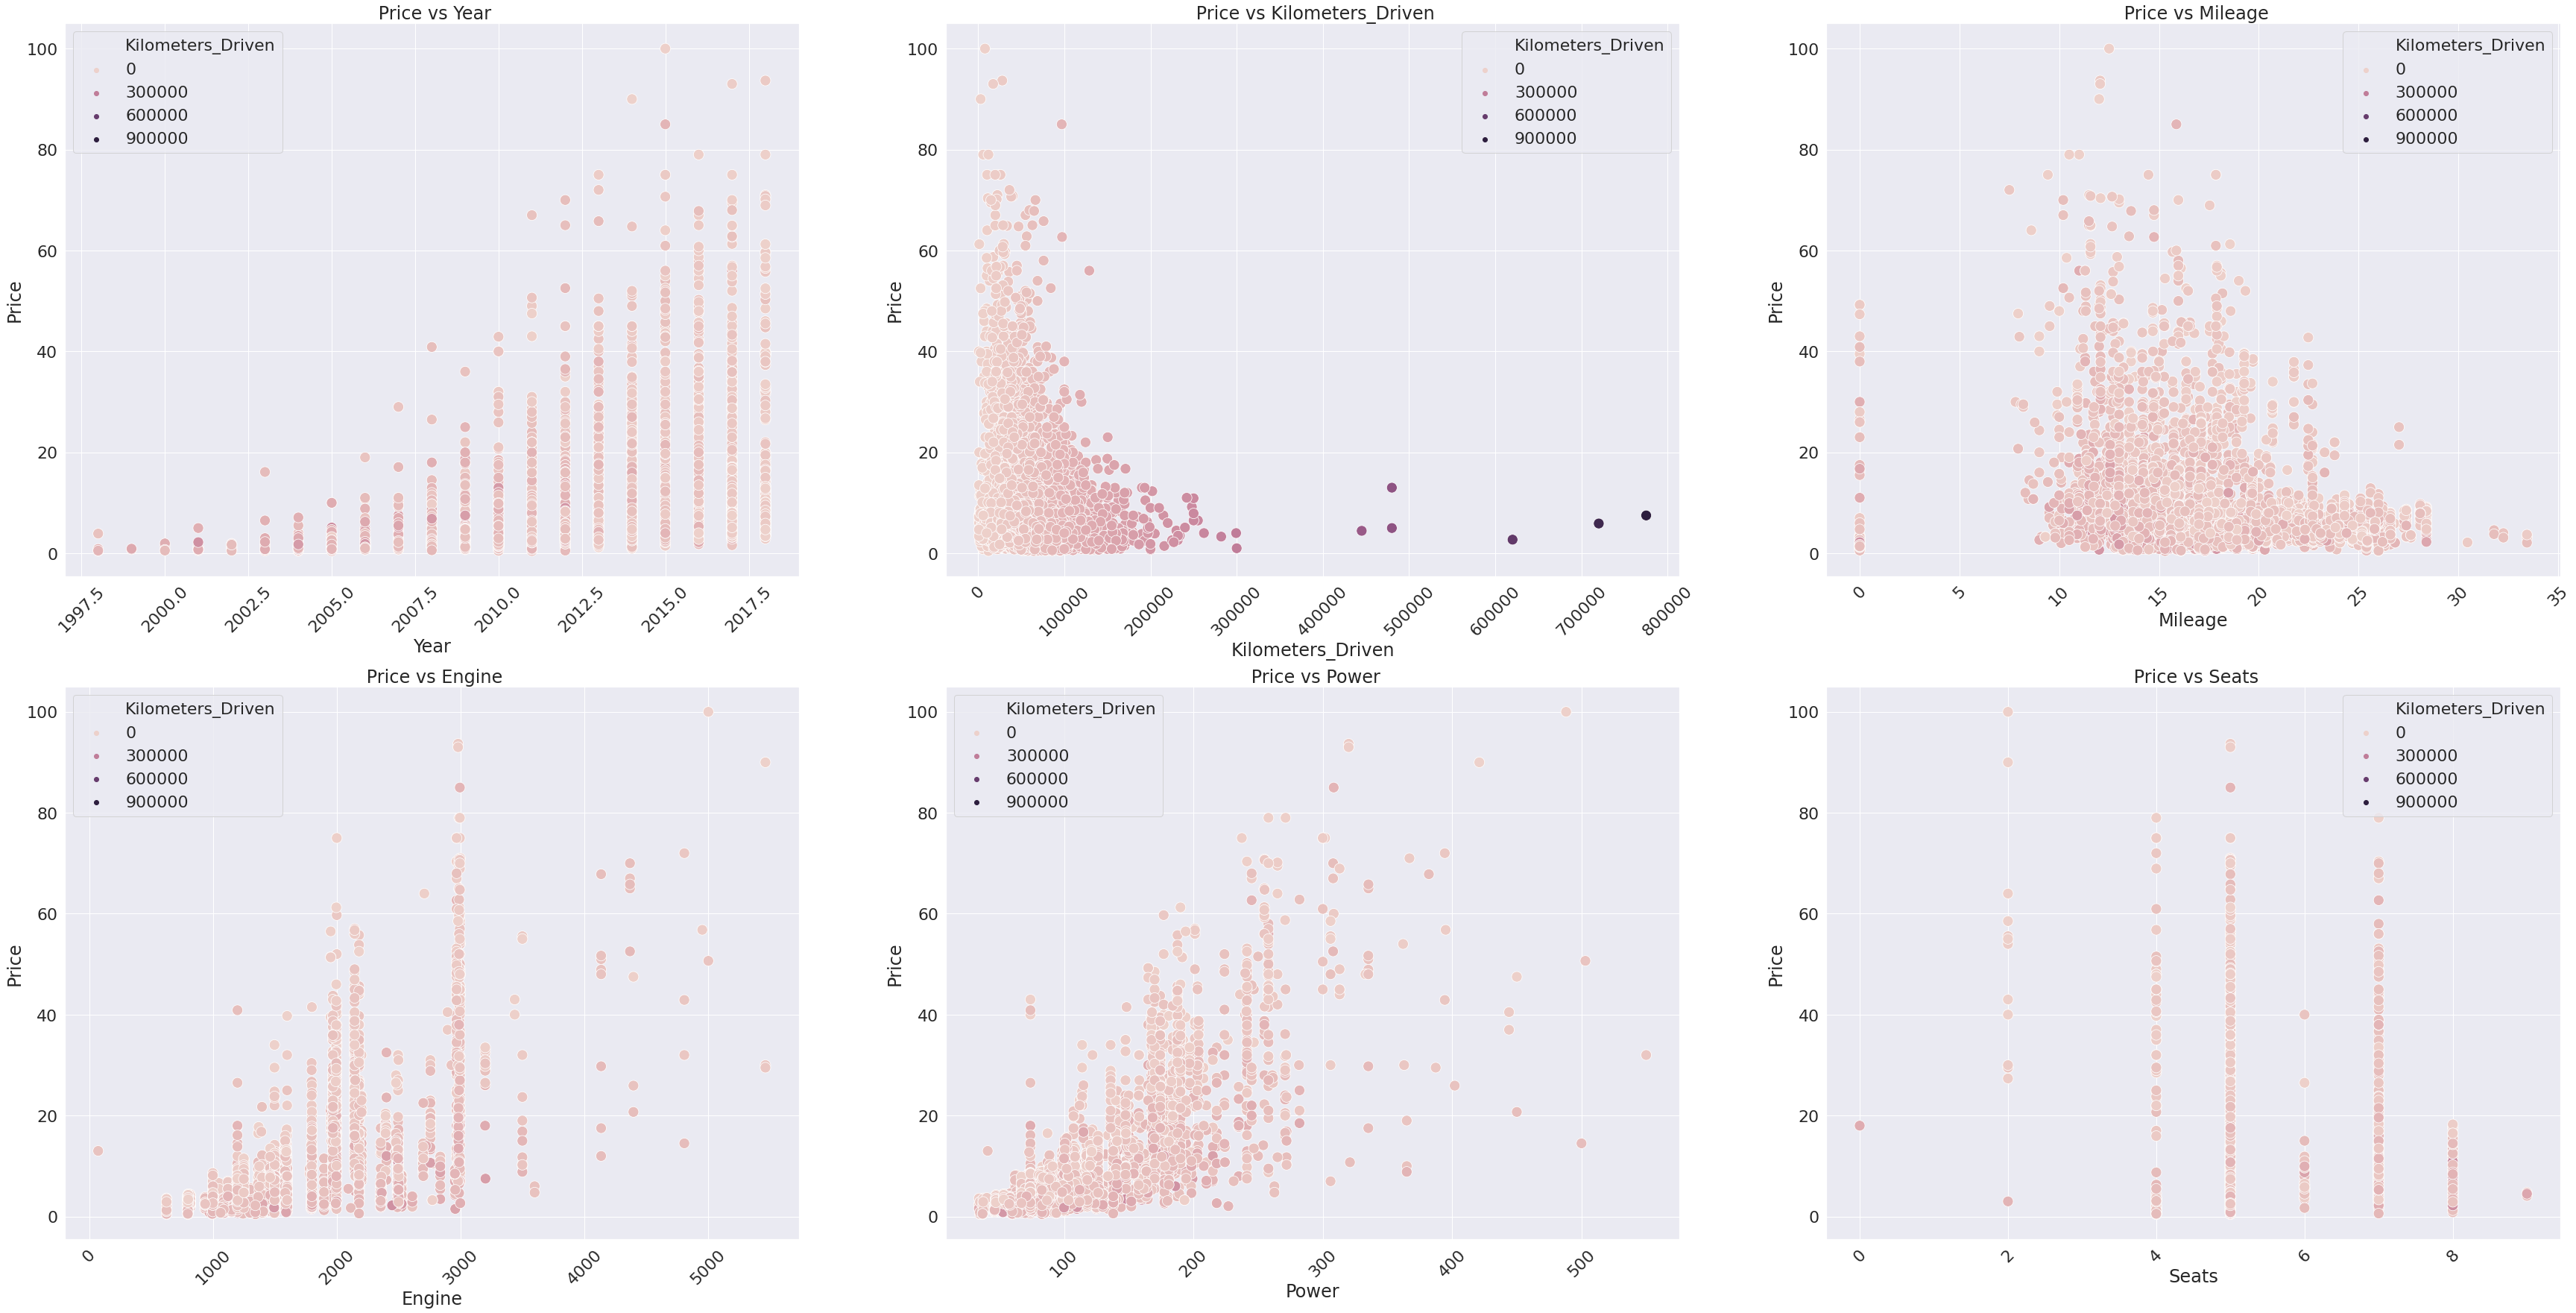

In [145]:
# def plot_multiple_graphs(dataset , numerical_features):
#     rows , cols = 2,3
#     fig , ax = plt.subplots(nrows = rows,ncols = cols, figsize = (20,10))
#     fig.suptitle("Comparing the features against the car prices")

#     for i , feature in enumerate(numerical_features):      
#         data = dataset.copy()
#         data.drop(["Price"] , axis = 1)
#         # print(i, ax)    
#         if numerical_features[i] != "Price":     
#             ax[i][i].plot(data[numerical_features[i]], data["Price"])
#             plt.xlabel((numerical_features[i]))
#             plt.ylabel("Price")
#             plt.show()
def plot_multiple_scatter_plots(dataset , numerical_features):
    sns.set(font_scale=2)
    plt.figure(figsize=(60,30))
    subplot_rows , subplot_cols = 2 , 3
    # plt.subplots(nrows = subplot_rows , ncols = subplot_cols,figsize=(500,100))
    for feature_index in range(len(numerical_features) - 1):
        if numerical_features[feature_index] == "Price":
            pass
        else:
            plt.subplot(subplot_rows , subplot_cols , feature_index + 1)
            sns.scatterplot(x = numerical_features[feature_index] , y = "Price" , data = dataset , hue =  "Kilometers_Driven" , s = 200)
            plt.xticks(rotation = 45)
            plt.xlabel(numerical_features[feature_index])
            plt.ylabel("Price")
            current_title = " Price vs " + str(numerical_features[feature_index])
            plt.title(current_title)


plot_multiple_scatter_plots(data_train , df_train)

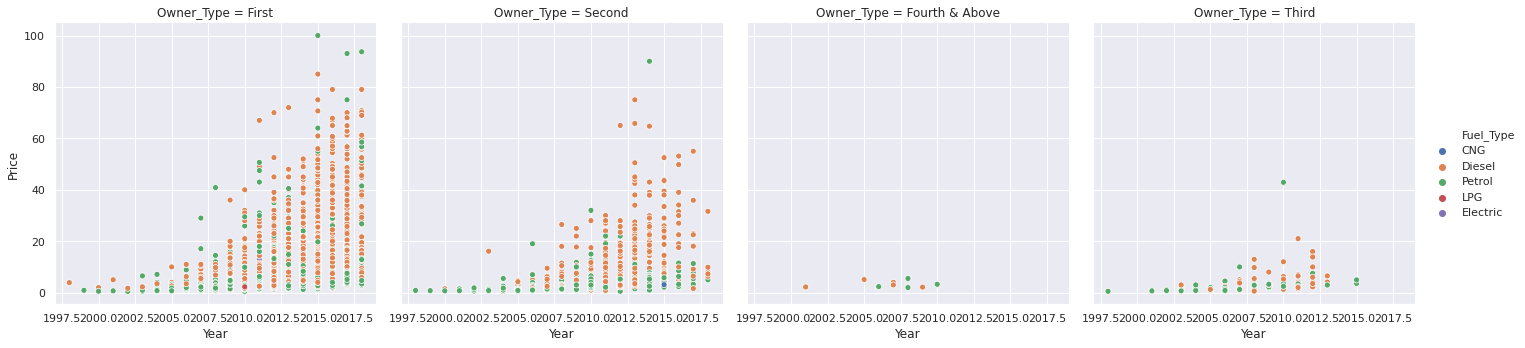

In [146]:
sns.set(font_scale = 1)
sns.relplot(x = "Year" , y = "Price" , data = data_train , hue = "Fuel_Type" , col = "Owner_Type")

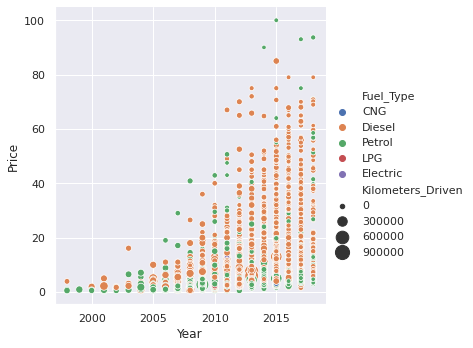

In [147]:
sns.relplot(x = "Year" , y = "Price" , data = data_train , hue = "Fuel_Type" , 
            size = "Kilometers_Driven", sizes=(20,200))

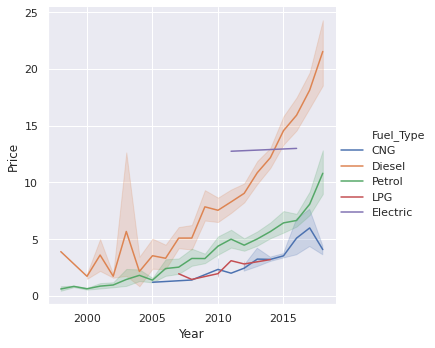

In [148]:
sns.relplot(x = "Year" , y = "Price" , data = data_train , hue = "Fuel_Type",  kind = "line" )

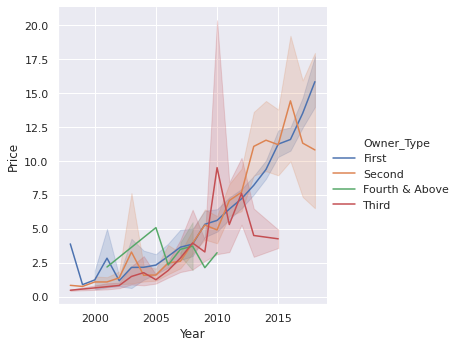

In [149]:
sns.relplot(x = "Year" , y = "Price" , data = data_train , hue = "Owner_Type", kind = "line" )

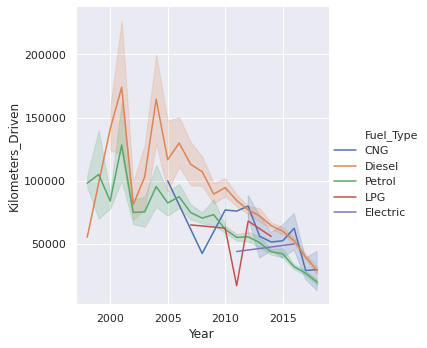

In [150]:
sns.relplot(x = "Year" , y = "Kilometers_Driven" , data = data_train , 
            hue = "Fuel_Type"  ,  kind = "line" )

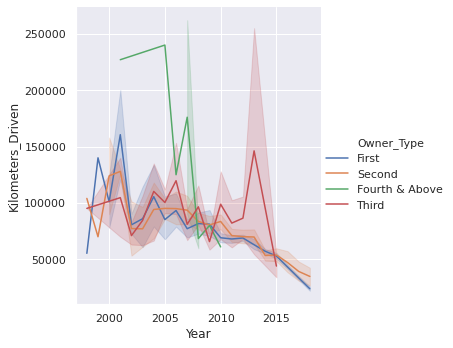

In [151]:
sns.relplot(x = "Year" , y = "Kilometers_Driven" , data = data_train ,
             hue = "Owner_Type"  ,  kind = "line" )

## Model Building

## Finally Printing the PDF


In [0]:
# !apt-get install texlive texlive-xetex texlive-latex-extra pandoc
# !pip install pypandoc

# from google.colab import drive
# drive.mount('/content/drive')

# !cp "/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/Kaustav_version5.ipynb"

# !jupyter nbconvert --to PDF "/content/drive/My Drive/Colab Notebooks/Verzeo Internship/Major Project/Kaustav_version5.ipynb"